<a href="https://colab.research.google.com/github/alex000kim/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/module2-sampling-confidence-intervals-and-hypothesis-testing/LS_DSPT3_132_Sampling_Confidence_Intervals_and_Hypothesis_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 132
## Sampling, Confidence Intervals, and Hypothesis Testing

## Prepare - examine other available hypothesis tests

If you had to pick a single hypothesis test in your toolbox, t-test would probably be the best choice - but the good news is you don't have to pick just one! Here's some of the others to be aware of:

In [1]:
import numpy as np
from scipy.stats import chisquare  # One-way chi square test

# Chi square can take any crosstab/table and test the independence of rows/cols
# The null hypothesis is that the rows/cols are independent -> low chi square
# The alternative is that there is a dependence -> high chi square
# Be aware! Chi square does *not* tell you direction/causation

ind_obs = np.array([[1, 1], [2, 2]]).T
print(ind_obs)
print(chisquare(ind_obs, axis=None))

dep_obs = np.array([[16, 18, 16, 14, 12, 12], [32, 24, 16, 28, 20, 24]]).T
print(dep_obs)
print(chisquare(dep_obs, axis=None))

[[1 2]
 [1 2]]
Power_divergenceResult(statistic=0.6666666666666666, pvalue=0.8810148425137847)
[[16 32]
 [18 24]
 [16 16]
 [14 28]
 [12 20]
 [12 24]]
Power_divergenceResult(statistic=23.31034482758621, pvalue=0.015975692534127565)


In [0]:
# Distribution tests:
# We often assume that something is normal, but it can be important to *check*

# For example, later on with predictive modeling, a typical assumption is that
# residuals (prediction errors) are normal - checking is a good diagnostic

from scipy.stats import normaltest
# Poisson models arrival times and is related to the binomial (coinflip)
sample = np.random.poisson(5, 1000)

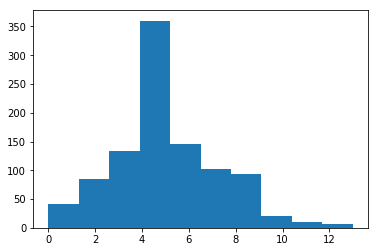

In [8]:
import matplotlib.pyplot as plt
plt.hist(sample);

In [9]:
print(normaltest(sample))  # Pretty clearly not normal

NormaltestResult(statistic=41.977854235000414, pvalue=7.666987793099111e-10)


In [10]:
sample = np.random.normal(50, 3, 1000)
print(normaltest(sample)) 

NormaltestResult(statistic=1.1249410959102801, pvalue=0.5697996062473611)


In [0]:
# Q-Q plot: https://en.wikipedia.org/wiki/Q%E2%80%93Q_plot
# https://www.youtube.com/watch?v=X9_ISJ0YpGw

And there's many more! `scipy.stats` is fairly comprehensive, though there are even more available if you delve into the extended world of statistics packages. As tests get increasingly obscure and specialized, the importance of knowing them by heart becomes small - but being able to look them up and figure them out when they *are* relevant is still important.

## T-test Assumptions

In [0]:
from scipy.stats import ttest_ind

#ttest_ind?

<https://statistics.laerd.com/statistical-guides/independent-t-test-statistical-guide.php>

- Independence of means

Are the means of our voting data independent (do not affect the outcome of one another)?
  
The best way to increase thel likelihood of our means being independent is to randomly sample (which we did not do).

- "Homogeneity" of Variance? 

Is the magnitude of the variance between the two roughly the same?

I think we're OK on this one for the voting data, although it probably could be better, one party was larger than the other.

If we suspect this to be a problem then we can use Welch's T-test

- "Dependent Variable" (sample means) are Distributed Normally

<https://stats.stackexchange.com/questions/9573/t-test-for-non-normal-when-n50>

Lots of statistical tests depend on normal distributions. We can test for normality using Scipy as was shown above.

This assumption is often assumed even if the assumption is a weak one. If you strongly suspect that things are not normally distributed, you can transform your data to get it looking more normal and then run your test. This problem typically goes away for large sample sizes (yay Central Limit Theorem) and is often why you don't hear it brought up. People declare the assumption to be satisfied either way. 



In [0]:
import matplotlib.pyplot as plt

In [50]:
skittles_fac_1 = np.random.normal(50, 5, size=100)
skittles_fac_1 = skittles_fac_1.round().astype(int)
skittles_fac_1[:10]

array([55, 49, 53, 60, 43, 47, 51, 43, 44, 49])

In [51]:
skittles_fac_1.mean()

49.45

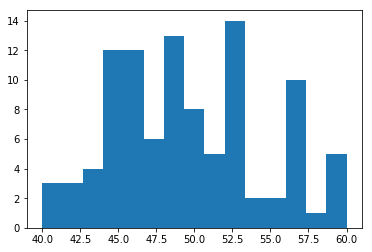

In [52]:
plt.hist(skittles_fac_1, bins=15);

In [53]:
skittles_fac_2 = np.random.normal(49.3, 5.5, size=100)
skittles_fac_2 = skittles_fac_2.round().astype(int)
skittles_fac_2[:10]

array([50, 36, 54, 50, 50, 40, 62, 57, 51, 48])

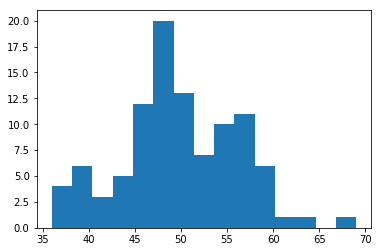

In [54]:
plt.hist(skittles_fac_2, bins=15);

In [55]:
ttest_ind(skittles_fac_1, skittles_fac_2)

Ttest_indResult(statistic=-0.300757117886975, pvalue=0.7639152838838391)

In [56]:
ttest_ind(skittles_fac_1, skittles_fac_2, equal_var=False)

Ttest_indResult(statistic=-0.300757117886975, pvalue=0.7639332000268664)

# T-test doesn't say anything about the difference variances (standard deviations) - only their means

In [82]:
skittles_fac_1 = np.random.normal(50, 2, size=5000)
skittles_fac_1 = skittles_fac_1.round().astype(int)
skittles_fac_1[:10]

array([48, 50, 52, 50, 47, 50, 49, 51, 49, 46])

In [83]:
skittles_fac_2 = np.random.normal(50, 4, size=5000)
skittles_fac_2 = skittles_fac_2.round().astype(int)
skittles_fac_2[:10]

array([59, 46, 41, 49, 52, 51, 47, 54, 50, 53])

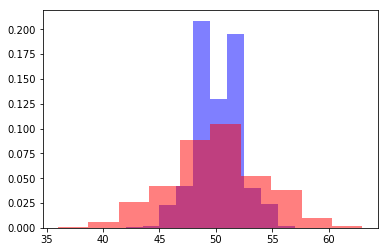

In [84]:
plt.hist(skittles_fac_1, alpha=0.5, color='b', density=True)
plt.hist(skittles_fac_2, alpha=0.5, color='r', density=True);

In [89]:
ttest_ind(skittles_fac_1, skittles_fac_2)

Ttest_indResult(statistic=-0.8550404939480469, pvalue=0.3925492189581954)

# KS-test

In [0]:
# https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test

In [0]:
from scipy.stats import ks_2samp

In [90]:
ks_2samp(skittles_fac_1, skittles_fac_2)

Ks_2sampResult(statistic=0.177, pvalue=8.282008012540285e-69)

In [96]:
skittles_fac_1 = np.random.normal(50, 3, size=1000)
skittles_fac_1 = skittles_fac_1.round().astype(int)
skittles_fac_1[:10]

array([49, 54, 55, 54, 47, 48, 53, 54, 52, 53])

In [97]:
skittles_fac_2 = np.random.normal(50, 3.3, size=1000)
skittles_fac_2 = skittles_fac_2.round().astype(int)
skittles_fac_2[:10]

array([43, 53, 47, 50, 51, 53, 50, 53, 46, 49])

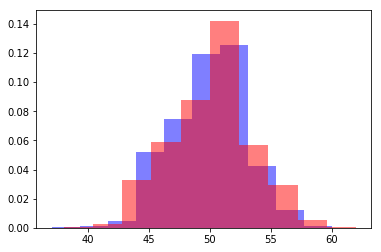

In [98]:
plt.hist(skittles_fac_1, alpha=0.5, color='b', density=True)
plt.hist(skittles_fac_2, alpha=0.5, color='r', density=True);

In [99]:
ks_2samp(skittles_fac_1, skittles_fac_2)

Ks_2sampResult(statistic=0.034, pvalue=0.6101664688189142)

In [0]:
def get_two_norm_dist(mus, sigmas, sizes):
  dist_list = []
  for i in range(2):
    dist = np.random.normal(mus[i], sigmas[i], size=sizes[i])
    dist = dist.round().astype(int)
    dist_list.append(dist)
  return dist_list

In [0]:
dist_1, dist_2 = get_two_norm_dist(mus=(50, 50), sigmas=(3, 3.3), sizes=(1000, 500))

In [6]:
ttest_ind(dist_1, dist_2)

Ttest_indResult(statistic=-0.0761614143093791, pvalue=0.9393008503688671)

In [7]:
ks_2samp(dist_1, dist_2)

Ks_2sampResult(statistic=0.033, pvalue=0.8572478810406149)

## Fair vs unfair dice example

In [0]:
unfair_die = np.array(150*[1] + 130*[2] + 50*[3] + 50*[4] + 130*[5] + 150*[6])

In [10]:
unfair_die.shape

(660,)

In [11]:
unfair_die.mean()

3.5

In [0]:
fair_die = np.array(110*[1] + 110*[2] + 110*[3] + 110*[4] + 110*[5] + 110*[6])

In [13]:
fair_die.shape

(660,)

In [14]:
fair_die.mean()

3.5

In [15]:
ttest_ind(unfair_die, fair_die)

Ttest_indResult(statistic=0.0, pvalue=1.0)

In [16]:
ks_2samp(unfair_die, fair_die)

Ks_2sampResult(statistic=0.09090909090909091, pvalue=0.008524685542396894)

## Central Limit Theorem



In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

N = 20000
n_size = 30
sample_means = []
for x in range(N):
  coinflips = np.random.binomial(n=1, p=.5, size=n_size)
  sample_means.append(coinflips.mean())

print(len(sample_means))
print(sample_means)

20000
[0.4666666666666667, 0.5, 0.5333333333333333, 0.43333333333333335, 0.5666666666666667, 0.5, 0.4, 0.43333333333333335, 0.4666666666666667, 0.5, 0.43333333333333335, 0.5666666666666667, 0.5666666666666667, 0.43333333333333335, 0.5, 0.6333333333333333, 0.6, 0.43333333333333335, 0.3333333333333333, 0.4, 0.43333333333333335, 0.43333333333333335, 0.5666666666666667, 0.6666666666666666, 0.4, 0.4, 0.6, 0.5, 0.5, 0.4, 0.5, 0.6, 0.43333333333333335, 0.5, 0.7, 0.5, 0.4666666666666667, 0.6, 0.36666666666666664, 0.7, 0.4666666666666667, 0.5666666666666667, 0.5333333333333333, 0.6333333333333333, 0.5333333333333333, 0.4666666666666667, 0.4666666666666667, 0.4, 0.5, 0.6, 0.6, 0.6333333333333333, 0.4666666666666667, 0.5, 0.6333333333333333, 0.43333333333333335, 0.26666666666666666, 0.5333333333333333, 0.4666666666666667, 0.5333333333333333, 0.5, 0.5333333333333333, 0.4, 0.6333333333333333, 0.6, 0.6666666666666666, 0.4, 0.5333333333333333, 0.4666666666666667, 0.6, 0.3333333333333333, 0.5333333333

In [40]:
# Create dataframe with single coin flip
df = pd.DataFrame({'one-samp': np.random.binomial(n=1, p=.5, size=30)})
df.head()

,one-samp
0,1
1,1
2,1
3,1
4,0


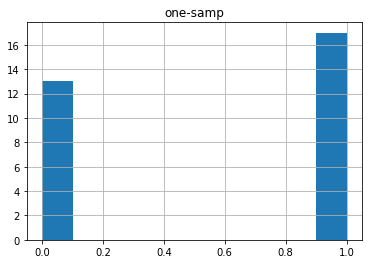

In [41]:
# Plot histogram to look at distribution of a single coin flip 
df.hist();

In [42]:
df['one-samp'].value_counts()

1    17
0    13
Name: one-samp, dtype: int64

In [43]:
df['one-samp'].mean()

0.5666666666666667

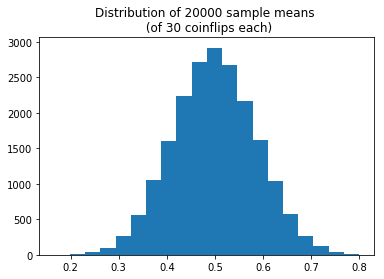

In [45]:
# Plot histogram to look at distribution of all coin flips
ax = plt.hist(sample_means, bins=20)
plt.title(f'Distribution of {N} sample means \n (of {n_size} coinflips each)');

What does the Central Limit Theorem State? That no matter the initial distribution of the population, the distribution of sample means taken will approximate a normal distribution as $n \rightarrow \infty$.

This has very important implications for hypothesis testing and is precisely the reason why the t-distribution begins to approximate the normal distribution as our sample size increases. 

## Standard Error of the Mean

What does it mean to "estimate"? the Population mean?

In [54]:
n_patients = 10*np.random.poisson(2.5, 2000)
n_patients

array([10, 20, 50, ..., 10, 10, 40])

In [55]:
np.unique(n_patients)

array([  0,  10,  20,  30,  40,  50,  60,  70,  80, 100])

Text(0.5, 1.0, 'Distibution of patients between 10 pm and 11 pm')

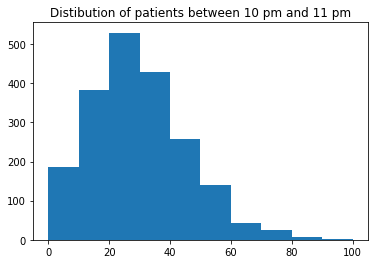

In [56]:
plt.hist(n_patients)
plt.title('Distibution of patients between 10 pm and 11 pm')

In [57]:
n_patients.mean()

24.79

In [51]:
np.median(n_patients)

20.0

In [59]:
population = pd.Series(10*np.random.poisson(2.5, 1000000))
population[:10]

0    50
1    10
2    10
3    10
4    20
5    30
6    60
7    20
8    20
9    10
dtype: int64

In [0]:
sample_means = []
for _ in range(1000):
  m = population.sample(100).mean()
  sample_means.append(m)

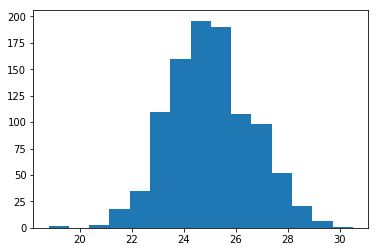

In [64]:
plt.hist(sample_means, bins=15);

## Build and Interpret a Confidence Interval

<img src="https://github.com/ryanallredblog/ryanallredblog.github.io/blob/master/img/Confidence_Interval.png?raw=true" width=400>

In [0]:
# https://www.youtube.com/watch?v=J1twbrHel3o
# https://www.youtube.com/watch?v=hlM7zdf7zwU
# https://www.youtube.com/watch?v=27iSnzss2wM

In [66]:
pop = pd.Series(np.random.binomial(1, p=0.45, size=1000000))
pop.sum()

449819

In [0]:
from scipy import stats 

def confidence_interval(data, confidence=0.95):
  """
  Calculate a confidence interval around a sample mean for given data.
  Using t-distribution and two-tailed test, default 95% confidence. 
  
  Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval
  
  Returns:
    tuple of (mean, lower bound, upper bound)
  """
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  stderr = stats.sem(data)
  t = stats.t.ppf((1 + confidence) / 2.0, n - 1)
  interval = stderr * t
  return (mean, mean - interval, mean + interval)

In [68]:
sample_size = 100
sample = pop.sample(sample_size)
sample.head()

600797    1
687461    0
536656    1
443727    1
530779    0
dtype: int64

In [71]:
sample_mean = sample.mean()
sample_std = np.std(sample, ddof=1)
print(sample_mean, sample_std)

0.43 0.49756985195624276


In [72]:
standard_error = sample_std/np.sqrt(sample_size)
standard_error

0.04975698519562428

In [73]:
t = 1.984 # 95% confidence
(sample_mean, sample_mean - t*standard_error, sample_mean + t*standard_error)

(0.43, 0.33128214137188144, 0.5287178586281186)

In [79]:
confidence_interval(sample, confidence=0.95)

(0.43, 0.3312713465188757, 0.5287286534811243)

## Run a $\chi^{2}$ Test "by hand" (Using Numpy)

In [80]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv', na_values=" ?")
print(df.shape)
df.head()

(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


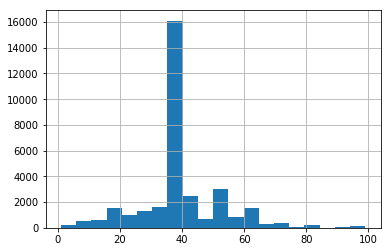

In [81]:
df['hours-per-week'].hist(bins=20);

In [82]:
df.describe(exclude='number')

,workclass,education,marital-status,occupation,relationship,race,sex,country,salary
count,30725,32561,32561,30718,32561,32561,32561,31978,32561
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [83]:
cut_points = [0, 9, 19, 29, 39, 49, 500]
label_names = ['0-9','10-19','20-29','30-39','40-49','50+']
df['hours_per_week_categories'] = pd.cut(df['hours-per-week'], cut_points, labels=label_names)
df['hours_per_week_categories'].value_counts()

40-49    18336
50+       6462
30-39     3667
20-29     2392
10-19     1246
0-9        458
Name: hours_per_week_categories, dtype: int64

In [84]:
df['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [86]:
df = df.sort_values(by='hours_per_week_categories')
# https://github.com/pandas-dev/pandas/issues/25278
contingency_table = pd.crosstab(df['sex'], df['hours_per_week_categories'], margins=True)
contingency_table

hours_per_week_categories,0-9,10-19,20-29,30-39,40-49,50+,All
sex,,,,,,,
Female,235,671,1287,1914,5636,1028,10771
Male,223,575,1105,1753,12700,5434,21790
All,458,1246,2392,3667,18336,6462,32561


## Expected Value Calculation
\begin{align}
expected_{i,j} =\frac{(row_{i\ total})(column_{j\ total} ) }{(\text{total observations})}  
\end{align}

In [87]:
row_sums = contingency_table.iloc[0:2, 6].values
col_sums = contingency_table.iloc[2, 0:6].values

print(row_sums)
print(col_sums)

[10771 21790]
[  458  1246  2392  3667 18336  6462]


In [88]:
total = contingency_table.loc['All','All']
total

32561

In [89]:
expected = []
for row_sum in row_sums:
  expected_row = []
  for column in col_sums:
    expected_val = column*row_sum/total
    expected_row.append(expected_val)
  expected.append(expected_row)
  
expected = np.array(expected)
print(expected.shape)
print(expected)

(2, 6)
[[  151.50388502   412.16995793   791.26046497  1213.02346365
   6065.44811277  2137.59411566]
 [  306.49611498   833.83004207  1600.73953503  2453.97653635
  12270.55188723  4324.40588434]]


## Chi-Squared Statistic with Numpy

\begin{align}
\chi^2 = \sum \frac{(observed_{i}-expected_{i})^2}{(expected_{i})}
\end{align}

For the $observed$ values we will just use a version of our contingency table without the margins as a numpy array. In this way, if our observed values array and our expected values array are the same shape, then we can subtract them and divide them directly which makes the calculations a lot cleaner. No for loops!

In [90]:
observed = pd.crosstab(df['sex'], df['hours_per_week_categories']).values
print(observed.shape)
observed

(2, 6)


array([[  235,   671,  1287,  1914,  5636,  1028],
       [  223,   575,  1105,  1753, 12700,  5434]])

In [91]:
chi_square = ((observed - expected)**2/(expected)).sum()
chi_square

2287.190943926107

In [0]:
# https://people.smp.uq.edu.au/YoniNazarathy/stat_models_B_course_spring_07/distributions/chisqtab.pdf

## Run a $\chi^{2}$ Test using Scipy

In [92]:
help(stats.chi2_contingency)

Help on function chi2_contingency in module scipy.stats.contingency:

chi2_contingency(observed, correction=True, lambda_=None)
    Chi-square test of independence of variables in a contingency table.
    
    This function computes the chi-square statistic and p-value for the
    hypothesis test of independence of the observed frequencies in the
    contingency table [1]_ `observed`.  The expected frequencies are computed
    based on the marginal sums under the assumption of independence; see
    `scipy.stats.contingency.expected_freq`.  The number of degrees of
    freedom is (expressed using numpy functions and attributes)::
    
        dof = observed.size - sum(observed.shape) + observed.ndim - 1
    
    
    Parameters
    ----------
    observed : array_like
        The contingency table. The table contains the observed frequencies
        (i.e. number of occurrences) in each category.  In the two-dimensional
        case, the table is often described as an "R x C table".
    

In [93]:
chi_squared, p_value, dof, expected = stats.chi2_contingency(observed)
print(chi_squared, p_value, dof, expected)

2287.190943926107 0.0 5 [[  151.50388502   412.16995793   791.26046497  1213.02346365
   6065.44811277  2137.59411566]
 [  306.49611498   833.83004207  1600.73953503  2453.97653635
  12270.55188723  4324.40588434]]


Null Hypothesis: Hours worked per week bins is **independent** of sex. 

Due to a p-value of 0, we REJECT the null hypothesis that hours worked per week and sex are independent, and conclude that there is an association between hours worked per week and sex. 